In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2


In [0]:
PATH = './gdrive/My Drive/DL/WorldModels-master'


In [0]:
import sys
sys.path.append(PATH)

In [5]:
!ls

gdrive	sample_data


In [6]:
# os.chdir('/gdrive/My Drive/DL/WorldModels-master')

FileNotFoundError: ignored

In [7]:
from vae.arch import VAE

Using TensorFlow backend.


In [8]:
vae = VAE()

Trying out for Carracing


In [9]:
vae.set_weights(PATH + '/vae/weights_single_vae.h5')

In [0]:
d = np.load(PATH + "/data/rollout/1232420618.npz")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


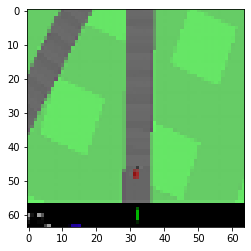

In [12]:
plt.imshow(d['obsB'][200,:,:,:])

In [0]:
list_input = [0.0] * 32
list_input[3] = 5.0

In [14]:
print(list_input)

[0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [0]:
# decoder_input = tf.Variable([[0.0] * 32])
decoder_input = tf.Variable([list_input])

In [0]:
encoder_output = vae.encoder.predict(d['obsB'], steps = 1)

In [17]:
encoder_output.shape

(300, 32)

In [18]:
encoder_output[200]

array([-3.8312623e-01,  1.2828693e+00, -9.0788674e-01,  7.5370693e-01,
       -1.6200173e+00, -1.2119796e+00, -3.1571863e+00, -1.4880779e+00,
       -2.4195103e-01,  1.9851153e+00,  9.6421528e-01,  1.0661505e+00,
       -6.1402136e-01,  6.8754321e-01,  1.9232297e+00, -1.4402763e+00,
       -1.8372899e+00,  2.9887024e-01, -1.9480119e+00,  1.0336509e+00,
       -7.3107636e-01,  2.4330938e-01, -2.7180389e-03, -1.0664656e+00,
       -1.5974324e+00,  4.8992008e-01,  7.0987415e-01,  2.3040445e+00,
       -1.1921431e+00,  1.4085916e+00,  5.5930984e-01, -1.6180526e+00],
      dtype=float32)

In [0]:
decoder_output = vae.decoder.predict(decoder_input, steps = 1)

In [0]:
result = decoder_output

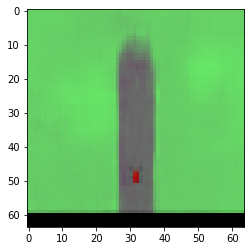

In [21]:
plt.imshow(result[0,:,:,:])

In [0]:
%%capture
%matplotlib inline
import ipywidgets as ipywidgets
from google.colab import widgets



def slider_visualization(slidersValue,slidersPos):
  list_input = [-0.08300223,  0.25277805, -0.3424488 ,  0.10299273,  1.2397656 ,
        0.66774046,  0.17988396, -1.7255512 ,  0.84001166,  1.5498929 ,
       -0.95611656, -0.12070499,  1.5427735 ,  1.268306  , -1.8390828 ,
        1.1358608 ,  0.8260876 ,  0.51799643, -1.9319972 , -0.6191522 ,
        0.15254739,  1.019719  , -0.3214063 ,  0.7094295 , -0.15158059,
        1.7033063 ,  0.36715084, -1.5056043 , -0.01234479,  0.791798  ,
        0.75108427, -1.5745927 ]

  list_input[slidersPos] = slidersValue
  print(list_input)
  decoder_input = tf.Variable([list_input])
  decoder_output = vae.decoder.predict(decoder_input, steps = 1)
  result = decoder_output
  plt.imshow(result[0,:,:,:])
  # print(sliders[3].value)

In [23]:
# sliders=[ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.01, orientation='vertical', description = 'latent ' + str(i)) for i in range(32)]


# grid = widgets.Grid(1, 34)
# for i in range(32):
#   with grid.output_to(0, i + 1):
#     display(sliders[i])
    
slidersValue = ipywidgets.FloatSlider(min=-250.0, max=250.0, step=.1, description = 'latent value')
slidersPos = ipywidgets.IntSlider(min = 0, max = 31, step = 1, description = 'latent position ')

ipywidgets.interact(slider_visualization, slidersValue = slidersValue,
                                          slidersPos = slidersPos)




interactive(children=(FloatSlider(value=0.0, description='latent value', max=250.0, min=-250.0), IntSlider(val…

<function __main__.slider_visualization>

In [0]:
neki = ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.01, orientation='vertical', description = 'latent ' + str(3303))

Visualization for different latent variables

Text(5, 10, 'result')

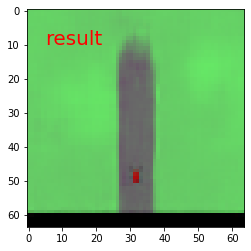

In [0]:
plt.imshow(result[0,:,:,:])
plt.text(5,10, 'result',fontsize=20, color='red',)

In [0]:
!pip install moviepy
!sudo apt-get install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


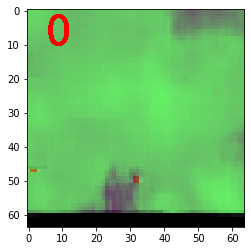

In [0]:
latent_pos = 0
for value in range(-250,250,10):
  list_input = [0.0] * 32

  list_input[latent_pos] = value
  # print(list_input)
  decoder_input = tf.Variable([list_input])
  decoder_output = vae.decoder.predict(decoder_input, steps = 1)
  result = decoder_output
  plt.imshow(result[0,:,:,:])
  plt.text(5,10, str(latent_pos + 1),fontsize=40, color='red')



In [0]:
import os
from moviepy.editor import ImageSequenceClip


def gif(filename, array, fps=10, scale=1.0):
    fname, _ = os.path.splitext(filename)
    filename = fname + '.gif'

    # copy into the color dimension if the images are black and white
    if array.ndim == 3:
        array = array[..., np.newaxis] * np.ones(3)

    # make the moviepy clip
    clip = ImageSequenceClip(list(array), fps=fps).resize(scale)
    clip.write_gif(filename, fps=fps)
    return clip

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)2932736/45929032 bytes (6.4%)7102464/45929032 bytes (15.5%)11223040/45929032 bytes (24.4%)15384576/45929032 bytes (33.5%)19521536/45929032 bytes (42.5%)23748608/45929032 bytes (51.7%)28024832/45929032 bytes (61.0%)32251904/45929032 bytes (70.2%)36519936/45929032 bytes (79.5%)40706048/45929032 bytes (88.6%)44900352/45929032 bytes (97.8%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

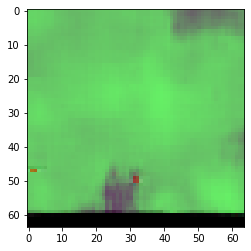

In [0]:
latent_pos = 0

result_gif = []
for value in range(-250,250,10):
  list_input = [0.0] * 32

  list_input[latent_pos] = value
  # print(list_input)
  decoder_input = tf.Variable([list_input])
  decoder_output = vae.decoder.predict(decoder_input, steps = 1)
  result = decoder_output
  result_gif.append(result)
  plt.imshow(result[0,:,:,:])


In [0]:
latent_pos = 0

for latent_pos in range(32):
  result_gif = []
  print(f'Starting with {latent_pos}')

  for value in range(-250,250,10):
    list_input = [0.0] * 32

    list_input[latent_pos] = value
    decoder_input = tf.Variable([list_input])
    decoder_output = vae.decoder.predict(decoder_input, steps = 1)
    result = decoder_output
    result_gif.append(result)
    # plt.imshow(result[0,:,:,:])

  result_gif_np = np.array(result_gif)[:,0,:,:,:]
  gif(PATH + f'/result_doom_{latent_pos}.gif', result_gif_np * 255, fps=10, scale=10.0)

Starting with 0

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_0.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 17.73it/s]


Starting with 1

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_1.gif with imageio


100%|██████████| 50/50 [00:09<00:00,  4.90it/s]


Starting with 2

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_2.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 17.70it/s]


Starting with 3

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_3.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 17.60it/s]


Starting with 4

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_4.gif with imageio


100%|██████████| 50/50 [00:03<00:00, 15.46it/s]


Starting with 5

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_5.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 18.96it/s]


Starting with 6

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_6.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 18.29it/s]


Starting with 7

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_7.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 17.30it/s]


Starting with 8

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_8.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 17.31it/s]


Starting with 9

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_9.gif with imageio


100%|██████████| 50/50 [00:09<00:00,  5.98it/s]


Starting with 10

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_10.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 18.84it/s]


Starting with 11

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_11.gif with imageio


100%|██████████| 50/50 [00:08<00:00,  5.38it/s]


Starting with 12

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_12.gif with imageio


100%|██████████| 50/50 [00:03<00:00, 16.01it/s]


Starting with 13

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_13.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 17.28it/s]


Starting with 14

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_14.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 18.11it/s]


Starting with 15

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_15.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 17.87it/s]


Starting with 16

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_16.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 18.72it/s]


Starting with 17

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_17.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 16.61it/s]


Starting with 18

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_18.gif with imageio


100%|██████████| 50/50 [00:08<00:00,  5.15it/s]


Starting with 19

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_19.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 17.63it/s]


Starting with 20

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_20.gif with imageio


100%|██████████| 50/50 [00:08<00:00,  6.03it/s]


Starting with 21

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_21.gif with imageio


100%|██████████| 50/50 [00:09<00:00,  5.04it/s]


Starting with 22

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_22.gif with imageio


100%|██████████| 50/50 [00:10<00:00,  4.14it/s]


Starting with 23

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_23.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 16.73it/s]


Starting with 24

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_24.gif with imageio


100%|██████████| 50/50 [00:05<00:00,  6.14it/s]


Starting with 25

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_25.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 18.91it/s]


Starting with 26

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_26.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 18.44it/s]


Starting with 27

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_27.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 18.01it/s]


Starting with 28

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_28.gif with imageio


100%|██████████| 50/50 [00:09<00:00,  4.94it/s]


Starting with 29

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_29.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 18.69it/s]


Starting with 30

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_30.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 17.46it/s]


Starting with 31

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/result_31.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 17.77it/s]


Trying out for Doom

In [0]:
vae.set_weights(PATH + '/vae/weights_single_vae_doom.h5')

In [0]:
d = np.load(PATH + "/data/rollout_doom/8134959802259222009.npz")

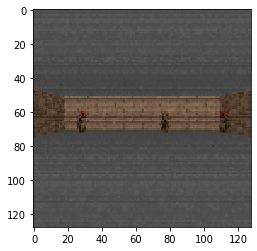

In [0]:
plt.imshow(d['frames'][0,:,:,:])

In [0]:
list_input = [0.0] * 32
list_input[3] = 5.0

In [0]:
print(list_input)

[0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [0]:
# decoder_input = tf.Variable([[0.0] * 32])
decoder_input = tf.Variable([list_input])

In [0]:
decoder_output = vae.decoder.predict(decoder_input, steps = 1)

In [0]:
result = decoder_output

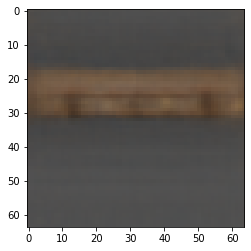

In [0]:
plt.imshow(result[0,:,:,:])

In [0]:
%%capture
%matplotlib inline
import ipywidgets as ipywidgets
from google.colab import widgets



def slider_visualization(slidersValue,slidersPos):
  list_input = [0.0] * 32

  list_input[slidersPos] = slidersValue
  print(list_input)
  decoder_input = tf.Variable([list_input])
  decoder_output = vae.decoder.predict(decoder_input, steps = 1)
  result = decoder_output
  plt.imshow(result[0,:,:,:])
  # print(sliders[3].value)

In [0]:
# sliders=[ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.01, orientation='vertical', description = 'latent ' + str(i)) for i in range(32)]


# grid = widgets.Grid(1, 34)
# for i in range(32):
#   with grid.output_to(0, i + 1):
#     display(sliders[i])
    
slidersValue = ipywidgets.FloatSlider(min=-250.0, max=250.0, step=1, description = 'latent value')
slidersPos = ipywidgets.IntSlider(min = 0, max = 31, step = 1, description = 'latent position ')

ipywidgets.interact(slider_visualization, slidersValue = slidersValue,
                                          slidersPos = slidersPos)




interactive(children=(FloatSlider(value=0.0, description='latent value', max=250.0, min=-250.0, step=1.0), Int…

<function __main__.slider_visualization>

In [0]:
neki = ipywidgets.FloatSlider(min=0.0, max=1.0, step=0.01, orientation='vertical', description = 'latent ' + str(3303))

Text(5, 10, 'result')

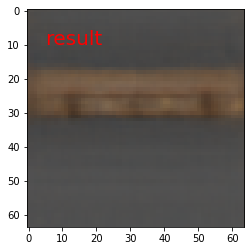

In [0]:
plt.imshow(result[0,:,:,:])
plt.text(5,10, 'result',fontsize=20, color='red',)

In [0]:
!pip install moviepy
!sudo apt-get install ffmpeg

Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


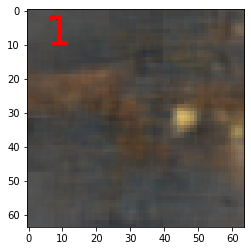

In [0]:
latent_pos = 0
for value in range(-250,250,10):
  list_input = [0.0] * 32

  list_input[latent_pos] = value
  # print(list_input)
  decoder_input = tf.Variable([list_input])
  decoder_output = vae.decoder.predict(decoder_input, steps = 1)
  result = decoder_output
  plt.imshow(result[0,:,:,:])
  plt.text(5,10, str(latent_pos + 1),fontsize=40, color='red')



In [0]:
import os
from moviepy.editor import ImageSequenceClip


def gif(filename, array, fps=10, scale=1.0):
    fname, _ = os.path.splitext(filename)
    filename = fname + '.gif'

    # copy into the color dimension if the images are black and white
    if array.ndim == 3:
        array = array[..., np.newaxis] * np.ones(3)

    # make the moviepy clip
    clip = ImageSequenceClip(list(array), fps=fps).resize(scale)
    clip.write_gif(filename, fps=fps)
    return clip

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)3850240/45929032 bytes (8.4%)8028160/45929032 bytes (17.5%)12345344/45929032 bytes (26.9%)16670720/45929032 bytes (36.3%)21102592/45929032 bytes (45.9%)25477120/45929032 bytes (55.5%)29917184/45929032 bytes (65.1%)34324480/45929032 bytes (74.7%)38739968/45929032 bytes (84.3%)43106304/45929032 bytes (93.9%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root/.imageio/ffmpeg/ffmpeg-linux64-v3.3.1.


In [0]:
latent_pos = 0

for latent_pos in range(32):
  result_gif = []
  print(f'Starting with {latent_pos}')

  for value in range(-250,250,10):
    list_input = [0.0] * 32

    list_input[latent_pos] = value
    decoder_input = tf.Variable([list_input])
    decoder_output = vae.decoder.predict(decoder_input, steps = 1)
    result = decoder_output
    result_gif.append(result)
    # plt.imshow(result[0,:,:,:])

  result_gif_np = np.array(result_gif)[:,0,:,:,:]
  gif(PATH + f'/vae_latent_variables/result_doom_{latent_pos}.gif', result_gif_np * 255, fps=10, scale=10.0)

Starting with 0

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_0.gif with imageio


100%|██████████| 50/50 [00:03<00:00, 15.33it/s]


Starting with 1

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_1.gif with imageio


100%|██████████| 50/50 [00:03<00:00, 12.90it/s]


Starting with 2

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_2.gif with imageio


100%|██████████| 50/50 [00:03<00:00,  9.69it/s]


Starting with 3

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_3.gif with imageio


100%|██████████| 50/50 [00:04<00:00, 12.01it/s]


Starting with 4

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_4.gif with imageio


100%|██████████| 50/50 [00:04<00:00,  9.51it/s]


Starting with 5

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_5.gif with imageio


100%|██████████| 50/50 [00:05<00:00, 14.27it/s]


Starting with 6

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_6.gif with imageio


100%|██████████| 50/50 [00:07<00:00,  5.96it/s]


Starting with 7

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_7.gif with imageio


100%|██████████| 50/50 [00:03<00:00, 13.80it/s]


Starting with 8

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_8.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 25.90it/s]


Starting with 9

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_9.gif with imageio


100%|██████████| 50/50 [00:04<00:00,  7.14it/s]


Starting with 10

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_10.gif with imageio


100%|██████████| 50/50 [00:05<00:00,  6.41it/s]


Starting with 11

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_11.gif with imageio


100%|██████████| 50/50 [00:03<00:00,  6.41it/s]


Starting with 12

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_12.gif with imageio


100%|██████████| 50/50 [00:07<00:00,  5.83it/s]


Starting with 13

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_13.gif with imageio


100%|██████████| 50/50 [00:04<00:00, 11.85it/s]


Starting with 14

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_14.gif with imageio


100%|██████████| 50/50 [00:03<00:00,  6.92it/s]


Starting with 15

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_15.gif with imageio


100%|██████████| 50/50 [00:05<00:00, 12.73it/s]


Starting with 16

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_16.gif with imageio


100%|██████████| 50/50 [00:05<00:00,  8.71it/s]


Starting with 17

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_17.gif with imageio


100%|██████████| 50/50 [00:04<00:00, 17.63it/s]


Starting with 18

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_18.gif with imageio


100%|██████████| 50/50 [00:06<00:00,  7.97it/s]


Starting with 19

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_19.gif with imageio


100%|██████████| 50/50 [00:03<00:00, 14.99it/s]


Starting with 20

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_20.gif with imageio


100%|██████████| 50/50 [00:06<00:00,  8.80it/s]


Starting with 21

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_21.gif with imageio


100%|██████████| 50/50 [00:07<00:00,  9.11it/s]


Starting with 22

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_22.gif with imageio


100%|██████████| 50/50 [00:04<00:00,  8.05it/s]


Starting with 23

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_23.gif with imageio


100%|██████████| 50/50 [00:03<00:00, 13.99it/s]


Starting with 24

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_24.gif with imageio


100%|██████████| 50/50 [00:06<00:00,  7.30it/s]


Starting with 25

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_25.gif with imageio


100%|██████████| 50/50 [00:05<00:00,  8.80it/s]


Starting with 26

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_26.gif with imageio


100%|██████████| 50/50 [00:06<00:00,  5.35it/s]


Starting with 27

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_27.gif with imageio


100%|██████████| 50/50 [00:05<00:00, 10.11it/s]


Starting with 28

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_28.gif with imageio


100%|██████████| 50/50 [00:03<00:00,  7.43it/s]


Starting with 29

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_29.gif with imageio


100%|██████████| 50/50 [00:03<00:00, 12.59it/s]


Starting with 30

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_30.gif with imageio


100%|██████████| 50/50 [00:03<00:00, 15.63it/s]


Starting with 31

[MoviePy] Building file ./gdrive/My Drive/DL/WorldModels-master/vae_latent_variables/result_doom_31.gif with imageio


100%|██████████| 50/50 [00:02<00:00, 17.94it/s]
